<a href="https://colab.research.google.com/github/Luis-Amagua/Curso_intro_redes_neuronales/blob/main/4Red_Neuronal_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando una red neuronal usando numpy

In [1]:
import numpy as np
# se cambia a GPU en colab: Entorno de ejecucion// cambiar entorno de ejcucion// GPU
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


In [5]:
N=1000 # ejemplos
gaussian_quantiles=make_gaussian_quantiles(mean=None, 
                        cov=0.1,
                        n_samples=N,
                        n_features=2, # caracteristicas
                        n_classes=2,
                        shuffle=True,
                        random_state=None)# circulos gausianos
X,Y =gaussian_quantiles

In [8]:
print(X.shape)
print(Y.shape) # es un vector

(1000, 2)
(1000,)


In [10]:
Y=Y[:,np.newaxis]

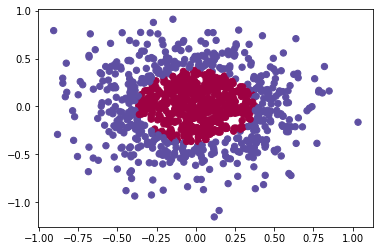

In [16]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

se necesita una red neuronal que sea capaz de dstingir que en el centro está una clase y a los bordos otra clase

In [18]:
# funciones de activacion

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)

In [19]:
# funcion de perdida
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [34]:
# cada neurona tiene pesos y bias

def initialize_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l], layers_dim[l-1])*2)-1
    parameters['b'+str(l+1)]=(np.random.rand(1, layers_dim[l-1])*2)-1
  return parameters



In [35]:
 np.random.rand(10,3) # tamaño matrix 10x3

array([[0.40820582, 0.19418976, 0.18044098],
       [0.11551284, 0.50654294, 0.52528465],
       [0.65446533, 0.56078185, 0.10259622],
       [0.87291684, 0.08710119, 0.26224173],
       [0.54006391, 0.343478  , 0.41976931],
       [0.06904324, 0.68073424, 0.67992987],
       [0.75320706, 0.77681855, 0.00401425],
       [0.14808   , 0.73158779, 0.17354727],
       [0.85978825, 0.11261   , 0.2725671 ],
       [0.09901647, 0.35259386, 0.98156449]])

In [36]:
layer_dim=[2,4,8,1]# numero de neuronas en cada capa


In [37]:
params=initialize_parameters_deep(layer_dim)
params

{'W1': array([[0.78745101],
        [0.02920485]]),
 'b1': array([[0.00983007]]),
 'W2': array([[-0.92366527, -0.16034811],
        [ 0.31695261,  0.73741842],
        [-0.17055689, -0.79249127],
        [-0.44101645,  0.02491068]]),
 'b2': array([[-0.86588213, -0.45445145]]),
 'W3': array([[ 0.22047115,  0.4530606 , -0.33941389,  0.72212356],
        [ 0.35370522,  0.51038266, -0.85670066,  0.7885554 ],
        [-0.67947169,  0.33964749, -0.82238479,  0.96866762],
        [ 0.80832254, -0.90377059,  0.16103571, -0.50610779],
        [-0.14356414,  0.43662436,  0.02821533, -0.29688847],
        [ 0.2439558 ,  0.72248836, -0.71189511,  0.32879899],
        [-0.51743323, -0.20560498,  0.16400477, -0.38751781],
        [ 0.5760906 ,  0.51941859,  0.93066833, -0.07084192]]),
 'b3': array([[-0.02407066,  0.82723684, -0.34055143, -0.29659408]])}